# **IMDb Movies Data Analysis**

# **Dataset Description**

The chosen dataset focuses on **IMDb movies** across all categories with significant audience engagement, specifically including only those with over 25,000 votes. It contains key metadata such as movie titles, year of release, genres, IMDb ratings, vote counts, and more.

This [dataset](https://www.kaggle.com/datasets/drshashikanthvydyula/imdb-movies/data) offers a comprehensive view of popular movies and shows, making it well suited for data analysis, trend exploration, and machine learning applications.

However, the source does not explicitly state how the data was collected. This lack of transparency may affect the reliability of the insights generated. For instance, the dataset's focus on highly rated movies introduces selection bias, potentially overlooking lesser known or niche titles.

Additionally, since IMDb ratings often reflect the preferences of users from specific regions, primarily the United States, there is a risk of regional bias in the findings.

### **Importing the dataset**

Read the downloaded `movies.csv` and load it as a DataFrame:


In [3]:
import pandas as pd
data = pd.read_csv("movies.csv")

Output the first five (5) observations in the dataset to check if it was successful:

In [4]:
data.head()

,title,year,certificate,runtime,genre,rating,metascore,synopsis,director,votes,gross,cast1,cast2,cast3,cast4
0,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"2,669,470",$534.86M,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
1,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"1,856,911",$377.85M,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
2,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,A thief who steals corporate secrets through t...,Christopher Nolan,"2,368,139",$292.58M,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
3,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,92.0,A meek Hobbit from the Shire and eight compani...,Peter Jackson,"1,886,353",$315.54M,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean
4,The Lord of the Rings: The Two Towers,2002,UA,179 min,"Action, Adventure, Drama",8.8,87.0,While Frodo and Sam edge closer to Mordor with...,Peter Jackson,"1,676,766",$342.55M,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom


### **Structure of the Data**

The IMDb movies dataset contains 10,067 observations with 15 variables, where each row represents a single movie or show and each column represents a specific attribute. The dataset focuses exclusively on content with over 25,000 user votes, ensuring high audience engagement across all entries.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10067 entries, 0 to 10066
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        10067 non-null  object 
 1   year         10067 non-null  object 
 2   certificate  8292 non-null   object 
 3   runtime      10064 non-null  object 
 4   genre        10067 non-null  object 
 5   rating       10067 non-null  float64
 6   metascore    8049 non-null   float64
 7   synopsis     10067 non-null  object 
 8   director     10067 non-null  object 
 9   votes        10067 non-null  object 
 10  gross        7252 non-null   object 
 11  cast1        10064 non-null  object 
 12  cast2        10063 non-null  object 
 13  cast3        10057 non-null  object 
 14  cast4        10047 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.2+ MB


Key variables capture essential movie characteristics including identification details, content information, performance metrics, and personnel data. The variables of the dataset are the following:
*   `title` - The title of the movie.
*   `year` - The year the movie was released.
*   `certificate` - The censor certificate given to the movie.
*   `runtime` - The length of duration of the movie in minutes.
*   `genre` - The genres the movie belongs to.
*   `rating` - The movie's rating from IMDb users' reviews.
*   `metascore` - The weighted average of reviews from reputed critics.
*   `synopsis` - A brief overview of the movie's plot.
*   `director` - The director of the movie.
*   `votes` - The number of votes the movie received from IMDb users.
*   `gross` - The gross revenue of the movie in US and Canada.
* `cast1`, `cast2`, `cast3` and `cast4` - The main cast members of the movie.

This structure provides comprehensive coverage of movie attributes necessary for trend analysis, rating prediction, and audience preference modeling.


### **About the Variables**

The variables encompass diverse data types to capture different aspects of movie information. String-based object variables include the movie `title`, release `year`, `certificate` rating, `runtime` duration, `genre` classification, plot `synopsis`, `director` name, `vote` count, `gross` earnings, and `cast` member names.

Numerical float64 variables capture the IMDb user `rating` on a scale of 1-10 and the `metascore` representing weighted averages from professional critics. The `genre` variable contains categorical information about movie classifications, while the `certificate` variable includes censor ratings such as PG, PG-13, R, and other classifications. The `votes` variable represents the total number of IMDb user votes, with the dataset's selection criteria ensuring no movie falls below the 25,000 vote threshold, and the gross variable captures box office earnings specifically from the US and Canadian markets.

This dataset structure provides a comprehensive foundation for various analytical approaches, including exploratory data analysis of movie trends, predictive modeling of ratings and box office performance, and machine learning applications focused on audience preferences. The combination of complete core variables and partially complete supplementary variables allows for robust analysis while acknowledging certain limitations in data availability, particularly regarding international box office performance and critic scores for some entries.

# **Dataset Cleaning / Preprocessing**


*italicized text*
This section documents the data cleaning and preprocessing procedure through each variable in the dataset that will be necessary for analysis.

### Cleaning **`year`** variable

First, we must check if each movie in the dataset has a **`year`** value:

In [6]:
bool(data['year'].isnull().any())

False

This means the year of release is listed among all movies.

We then check all the unique **`year`** values to identify inconsistent values:

In [7]:
data['year'].unique()

array(['2008', '2003', '2010', '2001', '2002', '1999', '1980', '2020',
       '1977', '1991', '1954', '2022', '1962', '2000', '1994', '2019',
       '1981', '2012', '2018', '1986', '1997', '2021', '1995', '1983',
       '1959', '2016', '1993', '1989', '2005', '1988', '2011', '1998',
       '2017', '1985', '1961', '1924', '2015', '1982', '1984', 'I 2013',
       '1926', '1958', '1949', '1975', '2014', '2006', '2004', '2007',
       '2009', '1964', '1969', '1938', 'I 2015', '2013', '2023', 'I 2011',
       '1987', 'I 2008', 'I 2010', '1972', '1992', '1960', '1971', '1967',
       '1973', '1932', '1948', 'II 2015', '1979', '1968', '1974', '1996',
       '1990', '1963', '1970', 'I 2021', 'I 2014', '1978', '1976',
       'I 2022', '1966', 'I 2007', 'I 1999', 'I 2019', 'I 2006', 'I 2017',
       'I 2009', 'I 1998', '1953', 'I 2018', 'I 2020', '1965', 'I 2016',
       'II 2019', 'II 2018', 'II 2020', 'II 2014', 'I 2012', 'I 1996',
       'II 2017', 'II 2005', 'III 2015', 'II 2012', 'II 2016',

Here we can see that there are two formats used for this variable, `<year>` and `<roman_numeral> <year>`. It also indicates that the datatype of this column is an `object`, which we will address later.

To know be more consistent with our data, we count the most prevalent representation of these values in the variable:

In [8]:
#pd.set_option("display.max_rows", None)
data['year'].value_counts()

year
2018        319
2014        311
2013        302
2016        299
2011        293
           ... 
II 2004       1
V 2022        1
I 1996        1
VII 2015      1
IV 2021       1
Name: count, Length: 190, dtype: int64

Based on the output, the most prevalent representation is `<year>`, and thus that will be chosen as the preferrable representation for the sake of consistency.

We replace the instances with **`year`** represented as `<roman_numeral> <year>` accordingly:

In [9]:
def clean_year(year):
  if len(str(year)) != 4:
    extracted_year = year.split() # split roman_num and year
    # print(extracted_year)
    return extracted_year[1]
  return year

data['year'] = data['year'].map(clean_year)

Now we confirm if the values were mapped correctly:

In [10]:
data['year'].value_counts()

year
2014    361
2018    360
2016    348
2013    342
2017    341
       ... 
1922      1
1920      1
1915      1
1916      1
1919      1
Name: count, Length: 107, dtype: int64

Now the `year` counts has been updated after cleaning, and we can replace its datatype to a numeric one:

In [11]:
data['year'] = data['year'].apply(int)

Check if data type conversion is successful:

In [12]:
data['year'].dtype

dtype('int64')

### Cleaning **```runtime```** variable ###

We check if each movie has a `runtime` value:

In [13]:
bool(data['runtime'].isnull().any())

True

This means not all movies have their `runtime` listed. However, it's possible that a listed movie is still in production, and thus it makes sense that it has no `runtime` yet.

Checking which observations don't have their runtimes listed:

In [14]:
data[data['runtime'].isnull()]

,title,year,certificate,runtime,genre,rating,metascore,synopsis,director,votes,gross,cast1,cast2,cast3,cast4
4032,Mantus,2014,NaN,NaN,"Comedy, Drama, Thriller",4.3,NaN,Madame Mary is the mother of Mantus (Satan) an...,Enzo Zelocchi,"28,697",NaN,Enzo Zelocchi,Miryam Negrin,Paul Gregory,Marina Vorobeva
5564,My Little Princess,2010,NaN,NaN,"Romance, Drama, Family",3.1,NaN,"A young Jewish man, Aaron, mid twenties, whos ...",Enzo Zelocchi,"43,565",NaN,Enzo Zelocchi,Charlotte Labadie,David M. Edelstien,Marsha Warren
8666,No War,2022,NaN,NaN,"Action, Drama",6.2,NaN,John a CIA contractor goes to Ukraine with his...,Enzo Zelocchi,"16,022",NaN,Enzo Zelocchi,Emilia Nimak,Antonio Gibertini,Andy Jr.


There are only 3 (out of the 10067) movies in the dataset without a `runtime` and they are all released before 2023 (the latest `year` in the dataset). It also has other missing values in columns that are useful for analysis. Thus, we can drop these rows accordingly:

In [15]:
data.dropna(subset='runtime', inplace=True)

Checking if the rows were successfully dropped:

In [16]:
bool(data['runtime'].isnull().any())

False

Now there are no longer movies without a `runtime` value. As a result, we only have 10064 observations left in the dataset.

In [17]:
len(data)

10064

We then check all the unique **`runtime`** values to identify inconsistent values:

In [18]:
data['runtime'].unique()

array(['152 min', '201 min', '148 min', '178 min', '179 min', '136 min',
       '124 min', '153 min', '121 min', '137 min', '207 min', '163 min',
       '133 min', '155 min', '110 min', '145 min', '181 min', '115 min',
       '164 min', '101 min', '149 min', '117 min', '134 min', '135 min',
       '141 min', '130 min', '170 min', '131 min', '168 min', '175 min',
       '161 min', '127 min', '119 min', '140 min', '111 min', '132 min',
       '107 min', '167 min', '162 min', '321 min', '156 min', '150 min',
       '45 min', '138 min', '147 min', '120 min', '143 min', '98 min',
       '123 min', '86 min', '67 min', '139 min', '114 min', '204 min',
       '104 min', '174 min', '165 min', '144 min', '242 min', '108 min',
       '159 min', '106 min', '103 min', '87 min', '160 min', '96 min',
       '128 min', '166 min', '182 min', '187 min', '126 min', '113 min',
       '109 min', '112 min', '99 min', '83 min', '102 min', '192 min',
       '129 min', '176 min', '100 min', '105 min', '90 min'

The format seems consistent among all `runtime` values. However, notice how it uses an `object` data type, despite being a numeric value. A numeric datatype would be helpful for analysis, so we should change this accordingly:

In [19]:
def to_num(runtime):
  return int(runtime.split()[0]) #split <number> and 'min', take number and convert to int

data['runtime'] = data['runtime'].apply(to_num)

In [20]:
data['runtime'].head()

0    152
1    201
2    148
3    178
4    179
Name: runtime, dtype: int64

### Cleaning **```genre```** variable ###

We check if each movie has a `genre` value:

In [21]:
bool(data['genre'].isnull().any())

False

This means every movie in the dataset has `genre` listed.

Now, let's check all the unique **`genre`** values to identify inconsistent values:

In [22]:
data['genre'].unique()

array(['Action, Crime, Drama', 'Action, Adventure, Drama',
       'Action, Adventure, Sci-Fi', 'Action, Sci-Fi',
       'Action, Adventure, Fantasy', 'Action, Drama',
       'Action, Drama, Mystery', 'Action, Adventure, Crime',
       'Action, Adventure', 'Animation, Action, Adventure',
       'Action, Biography, Drama', 'Action, Adventure, Mystery',
       'Action, Crime, Thriller', 'Action, Drama, War',
       'Action, Thriller', 'Action, Drama, Sport',
       'Action, Drama, Sci-Fi', 'Action, Comedy, Crime',
       'Action, Drama, Thriller', 'Action, Comedy, Romance',
       'Action, Drama, History', 'Action, Biography, Crime',
       'Action, Adventure, Comedy', 'Action, Adventure, Thriller',
       'Action, Comedy', 'Animation, Action, Drama',
       'Action, Mystery, Thriller', 'Action, Drama, Romance',
       'Action, Sci-Fi, Thriller', 'Action, Drama, Western',
       'Animation, Action, Crime', 'Action, Adventure, Western',
       'Action, Adventure, Romance', 'Action, Adventu

Based on this output, we can see that many unique `genre` values have similar genres regardless. This would be difficult to perform categorical data analysis if we kept this as is.

Thus, we'll perform Column Transformation and split the `genre` values:

In [23]:
#split genres into three separate columns:
genre_split = data['genre'].str.split(', ', expand=True)
genre_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10064 entries, 0 to 10066
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10064 non-null  object
 1   1       9244 non-null   object
 2   2       6688 non-null   object
dtypes: object(3)
memory usage: 314.5+ KB


Based on the output, a movie in the dataset can have a maximum of three (3) listed genres. With this in mind, we can split the `genre` column into 3 columns respectively:

In [24]:
genre_split.columns = ['genre1', 'genre2', 'genre3'] #name the columns

#get genre index
index = data.columns.get_loc('genre')

#drop original genre column
data = data.drop(columns='genre')

#insert split genre columns
data.insert(index, 'genre1', genre_split['genre1'])
data.insert(index + 1, 'genre2', genre_split['genre2'])
data.insert(index + 2, 'genre3', genre_split['genre3'])

Now check if the genres were successfully split:

In [25]:
data[['genre1','genre2','genre3']].head()

,genre1,genre2,genre3
0,Action,Crime,Drama
1,Action,Adventure,Drama
2,Action,Adventure,Sci-Fi
3,Action,Adventure,Drama
4,Action,Adventure,Drama


Now for each `genre` column, we check if there are inconsistencies with the formats:

In [26]:
data['genre1'].unique()

array(['Action', 'Animation', 'Adventure', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Musical', 'Family', 'Fantasy', 'Film-Noir', 'Horror',
       'Mystery', 'Romance', 'Sci-Fi', 'Western', 'Thriller', 'Music',
       'War', 'History'], dtype=object)

In [27]:
data['genre2'].unique()

array(['Crime', 'Adventure', 'Sci-Fi', 'Drama', 'Action', 'Biography',
       'Thriller', 'Comedy', 'Mystery', 'Horror', 'Western', 'Fantasy',
       'War', 'Romance', 'Sport', None, 'Family', 'Musical', 'Music',
       'History', 'Film-Noir'], dtype=object)

In [28]:
data['genre3'].unique()

array(['Drama', 'Sci-Fi', None, 'Fantasy', 'Mystery', 'Crime',
       'Adventure', 'Thriller', 'War', 'Sport', 'Romance', 'History',
       'Comedy', 'Western', 'Biography', 'Horror', 'Family', 'Music',
       'Musical', 'Film-Noir', 'Action'], dtype=object)

It is important to note that across the three `genre` columns, some genres are not in all three columns (e.g., Animation only appears in `genre1`). All three columns must be considered if this variable is used for analysis.



### Cleaning **`metascore`** variable



Checking for any null values:

In [29]:
bool(data['metascore'].isnull().any())

True

Theres null values, and metascore data will be useful if we want to see a movie's reception from critics. Thus we drop observations with null metascores.

In [30]:
data = data.dropna(subset=['metascore'])

As a result, the remaining number of movies in the dataset decreased from 10064 to 8049.

In [31]:
print("Remaining observations:", int(len(data)))

Remaining observations: 8049


### Cleaning **`director`** variable

We first check for null observations.

In [32]:
bool(data['director'].isnull().any())

False

Since there are none, no data cleaning has to be done with this variable.

In [33]:
data['metascore'].isnull().sum()

0

### Cleaning **`votes`** variable

We first check for null observations.

In [34]:
bool(data['votes'].isnull().any())

False

Now, let us check some of the observations under the votes column

In [35]:
data['votes'].unique()

array(['2,669,470', '1,856,911', '2,368,139', ..., '24,836', '22,415',
       '12,432'], dtype=object)

Observe that these observations have commas. If we want to perform numerical operations, we would have to remove these commas and convert the observations to numeric values. So, performing the necessary cleaning gives us:

In [36]:
data['votes'] = data['votes'].astype(str).str.replace(',', '', regex=False)
data['votes'] = pd.to_numeric(data['votes'], errors='coerce').astype('Int64')
data.dropna(subset=['votes'], inplace=True)
#to check
data['votes'].unique()

<IntegerArray>
[2669470, 1856911, 2368139, 1886353, 1676766, 1924189, 1300080, 1372540,
 1106151,  348593,
 ...
   17134,   11553,   10926,   20177,   11488,   16541,   10708,   24836,
   22415,   12432]
Length: 7694, dtype: Int64

### Cleaning **`gross`** variable

We first check for null observations.

In [37]:
bool(data['gross'].isnull().any())

True

Since there are null observations, we will perform data cleaning Checking the amount of null values for this variable:

In [38]:
int(data['gross'].isna().sum())

1426

Out of 8049 observations, there are 1426 movies that don't have a recorded revenue from US and Canada. We will be removing the cells that have no 'gross' observation.

In [39]:
data.dropna(subset=['gross'], inplace=True)
bool(data['gross'].isnull().any())

False

As a result, only 6623 observations remain in the dataset.

In [40]:
print("Remaining observations:", len(data))

Remaining observations: 6623


We will also remove '$' and 'M' and convert the observations to numerical value.

In [41]:
data['gross'] = data['gross'].astype(str).replace('nan', '')
data['gross'] = data['gross'].str.strip()
data['gross'] = data['gross'].str.replace('$', '', regex=False).str.replace('M', '', regex=False)
data['gross'] = pd.to_numeric(data['gross'], errors='coerce')
data['gross'] *= 1_000_000
data['gross'].head()

0    534860000.0
1    377850000.0
2    292580000.0
3    315540000.0
4    342550000.0
Name: gross, dtype: float64

The null observations have been removed, and the remaining values in the gross column have been converted for ease of analysis. It is important to note that the observations now represent their true values in dollars, as the initial measurements were expressed in millions.

### Checking for duplicates ###

The dataset's description in Kaggle states the following note:
> **Duplicates:** You will find duplicate movie titles, these are either remakes of original movie or completely different movies with same name. You can check the director, release year, and cast as reference for duplicate movies

Using the mentioned variables, we'll check for any remaining duplicates in the dataset:

In [42]:
duplicates_remaining = data.duplicated(subset=['title', 'year', 'director', 'cast1', 'cast2', 'cast3', 'cast4']).sum()
print("Remaining duplicates:", duplicates_remaining)

Remaining duplicates: 0


Now we check for possible duplicates:

In [43]:
possible_duplicates = data[data.duplicated(subset=['title'], keep=False)]
possible_duplicates = possible_duplicates.sort_values(by='title')
possible_duplicates[['title', 'year', 'director', 'cast1', 'cast2', 'cast3', 'cast4']]

,title,year,director,cast1,cast2,cast3,cast4
5628,A Nightmare on Elm Street,1984,Wes Craven,Heather Langenkamp,Johnny Depp,Robert Englund,John Saxon
4510,A Nightmare on Elm Street,2010,Samuel Bayer,Jackie Earle Haley,Rooney Mara,Kyle Gallner,Katie Cassidy
6486,A Star Is Born,1954,George Cukor,Judy Garland,James Mason,Jack Carson,Charles Bickford
6810,A Star Is Born,1937,William A. Wellman,Janet Gaynor,Fredric March,Adolphe Menjou,May Robson
4802,A Star Is Born,2018,Bradley Cooper,Lady Gaga,Bradley Cooper,Sam Elliott,Greg Grunberg
...,...,...,...,...,...,...,...
639,Unknown,2011,Jaume Collet-Serra,Liam Neeson,Diane Kruger,January Jones,Aidan Quinn
9948,Venom,2005,Jim Gillespie,Agnes Bruckner,Jonathan Jackson,Meagan Good,Bijou Phillips
744,Venom,2018,Ruben Fleischer,Tom Hardy,Michelle Williams,Riz Ahmed,Scott Haze
8280,When a Stranger Calls,1979,Fred Walton,Carol Kane,Charles Durning,Rutanya Alda,Carmen Argenziano


Based on the output, each movie with a duplicate title are released in different years and have different director sets of cast members. As the description suggests, we can say that these movies are remakes or movies with the same name. Thus, we will not be dropping any observations at this point.

# **Research Question and Exploratory Data Analysis**





Main Research Question:
**Which specific attributes of a movie are factors for its popularity and success on IMDb?**

Now that we have a cleaned and processed movie dataset, we begin exploring this question throught three (3) structured research questions.

First, we import necessary libraries for data visualization and operations.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import pearsonr, f_oneway
%matplotlib inline

### **EDA Question 1:** Do movies of different genres have significantly different IMDb ratings and vote counts?


To explore this question, we focus on the following **variables of interest:**
* `genre1`, `genre2`, `genre3`: The three main genres of a movie
* `rating`: IMDb rating
* `votes`: Number of IMDb votes

To analyze how IMDb ratings vary by genre, we first transform the structure of our dataset. In our dataset, a movie can belong to at most **three** different genres. It would be difficult to summarize each genre if we are to keep the current structure.

Thus, we use the `melt()` function to split the movies based on their listed genres, indicating that each movie belongs to each of these respective genres.

In [45]:
data_single_genre = data.melt(
    id_vars=['rating'],
    value_vars=['genre1','genre2','genre3'],
    value_name='genre'
).dropna(subset=['genre'])

data_single_genre.sample(5) #sample because head() only shows topmost movies, which are all action movies.

,rating,variable,genre
1059,5.9,genre1,Action
7821,5.5,genre2,Adventure
9167,7.0,genre2,Romance
3930,7.5,genre1,Drama
6867,7.3,genre2,Drama


Next, we compute statistical summaries of IMDb ratings for each genre.
The statistical summaries chosen for the ratings per genre are:
* The **mean** to show the overall average rating per genre
* The **median** to show the central rating that is less affected by outliers or skewed distributions
* The **standard deviation** to show how spread out the ratings are within each genre (i.e., how much variation there is in viewer opinions).
* The **interquartile range** (IQR) a more informative measure of spread that is not influenced by extreme values, as we are unsure if ratings per genre has outliers or not.

Getting the exact values for the mean, median, standard deviation and IQR:

In [46]:
def iqr(x):
  return x.quantile(0.75) - x.quantile(0.25)

rating_per_genre = data_single_genre.groupby('genre').agg({'rating':['mean','median','std', iqr]})
rating_per_genre.sort_values(by=('rating', 'median'), ascending=False)

rating                        
               mean median       std    iqr
genre                                      
Film-Noir  7.884615    8.0  0.299572  0.200
War        7.165672    7.3  0.763756  1.000
Western    7.098611    7.2  0.729942  1.025
History    7.050490    7.1  0.620464  0.900
Biography  7.096319    7.1  0.585398  0.800
Musical    6.802632    7.0  0.989272  1.125
Drama      6.869300    6.9  0.772030  1.000
Animation  6.823599    6.9  0.904969  1.200
Music      6.757075    6.8  0.808191  1.000
Sport      6.672903    6.8  0.831390  1.000
Crime      6.654863    6.7  0.845097  1.100
Romance    6.557349    6.6  0.833819  1.000
Adventure  6.489858    6.6  0.988430  1.300
Thriller   6.472940    6.5  0.894285  1.100
Comedy     6.404902    6.5  0.889384  1.100
Mystery    6.508095    6.5  0.937022  1.200
Sci-Fi     6.391881    6.4  1.040449  1.300
Family     6.342241    6.4  1.099606  1.600
Action     6.402328    6.4  0.921562  1.100
Fantasy    6.307649    6.3  1.011687  1.300
Horror     6.010256    6.1  0.947430  1.300

Based on the summary statistics in the `rating_per_genre` DataFrame, we can see that the average IMDb ratings for each genre fall approximately between 6.0 and 8.0, with varying degrees of spread.

Most genres have a standard deviation greater than 0.8 and an IQR greater than 1.0, suggesting that the ratings are fairly spread out and may include outliers or a wider range of viewer reception.

This variation in spread, especially when the standard deviation is high relative to the IQR, may be due to the presence of extreme values or skewed distributions in the data.

To better understand these differences and detect potential outliers or skewness, we visualize these distributions using a box plot:

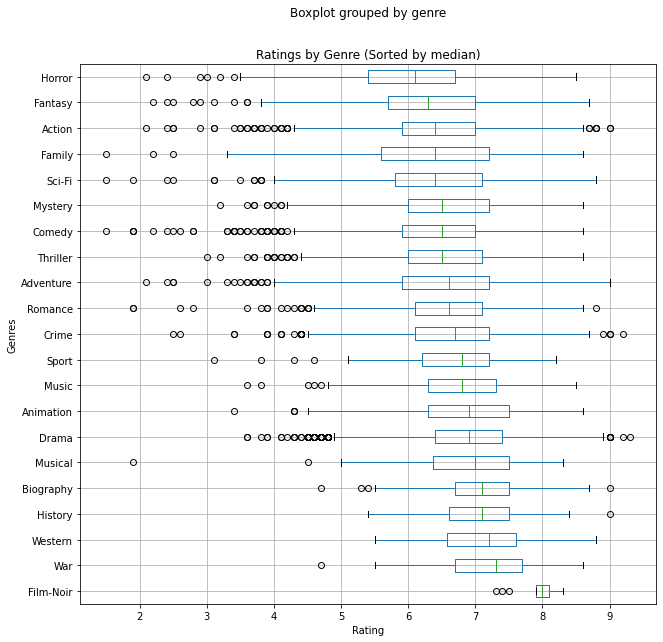

In [47]:
order = rating_per_genre['rating']['median'].sort_values(ascending=False).index
order = list(order)

ordered_ratings = data_single_genre
ordered_ratings['genre'] = pd.Categorical(ordered_ratings['genre'], categories=order, ordered=True)

ordered_ratings.boxplot(column='rating', by='genre', rot=90, figsize=(10, 10), vert=False)

plt.xlabel('Rating')
plt.ylabel('Genres')
plt.yticks(rotation=0)
plt.title('Ratings by Genre (Sorted by median)')
plt.show()

Here we can see notable differences in the rating distributions between each genre. Genres with higher mean and median ratings include **Film-Noir**, **War**, **Western**, **History** and **Biography**, suggesting that these genres are generally well-liked. While **Horror**, **Fantasy**, **Family**, and **Action** have the lowest average ratings and middle value, indicating more mixed or negative reception overall.

The boxplot indicates many outliers on various genres, particularly movies that are rated very low or lower than expected. These low-rated outliers reflect poorly received or polarizing films within each genre, which indicates some inconsistencies in audience expectations.

Furthermore, we can also see that the higher-rated genres tend to have fewer outliers, are less spread out, and are sometimes more skewed compared to those in the middle to lower end of the scale. These genres also appear to have fewer observations in the dataset. This suggests that these genres are more niche, but are consistently well-received films.

On the other hand, broader genres like **Action**, **Comedy**, and **Horror** have a larger number of films due to their wider audience, resulting in greater variation in quality and and audience responses. This is reflected by the wider spread and higher number of outliers.

---
Now we shift our focus to the difference of number of user votes across each genre.

To showcase the total number of votes of each movie in the dataset:


In [48]:
print('Total votes:',(data['votes'].agg('sum')))

Total votes: 788612085


In our processed movie dataset, the overall user votes from every movie in the dataset is 788,612,085. Unlike analyzing ratings, counting how many votes each movie in a specific genre is not ideal as this will result an overcount, considering that the majority of listed movies have 3 listed genres.

To avoid overcounting votes for movies with multiple genres, we instead equally divide a movie's vote count based on its number of listed genres:

In [49]:
data_genre_count = data[['genre1', 'genre2', 'genre3', 'votes']].copy()

# Calculate number of genres per movie
data_genre_count['genre_count'] = data_genre_count[['genre1', 'genre2', 'genre3']].count(axis=1)

# Adjust vote count by dividing by genre count
data_genre_count['vote_count'] = data_genre_count['votes'] / data_genre_count['genre_count']

# Drop the original 'votes' column
data_genre_count = data_genre_count.drop('votes', axis=1)

After dividing each movie's vote count, then we apply `melt()` to separate the genres:

In [50]:
data_genre_count = data_genre_count.melt(
    id_vars= ['vote_count'],
    value_vars=['genre1','genre2','genre3'],
    value_name='genre'
).dropna(subset=['genre'])


data_genre_count.sample(5)

,vote_count,variable,genre
16179,8381.0,genre3,Thriller
5490,12908.0,genre1,Comedy
13423,62494.666667,genre3,Drama
13848,66396.666667,genre3,Thriller
8387,12791.333333,genre2,Adventure


Checking if the adjusted vote counts still equal to the overall vote count:

In [51]:
print('Total votes:',(data_genre_count['vote_count'].agg('sum')))

Total votes: 788612085.0


We then group the adjusted vote counts by genre and visualize the counts with a bar graph:


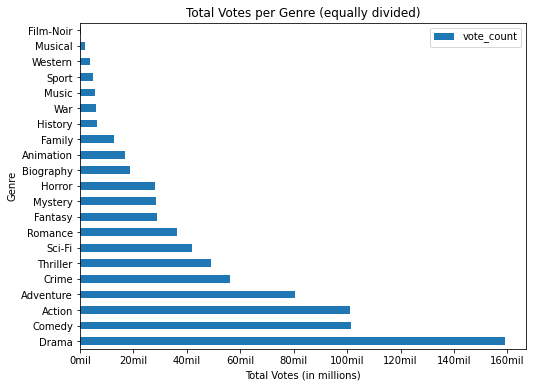

In [52]:
votes_per_genre = data_genre_count.groupby('genre').sum('vote_count').sort_values('vote_count',ascending=False)
votes_per_genre.plot.barh(figsize=(8, 6))

def to_million(value, tick_number):
    return f'{int(value / 1000000)}mil'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(to_million))

plt.xlabel('Total Votes (in millions)')
plt.ylabel('Genre')
plt.title('Total Votes per Genre (equally divided)')
plt.show()

From this bar graph, it indicates that **Drama**, **Comedy**, **Action**, and **Adventure** movies have the largest number of votes compared to other genres. Like in the previous analysis, this suggests that these genres have a larger number of films and have more audience engagement.

On the other hand, genres like **Film-Noir**, **Musical**, **Western** and **Sport** received very few votes, implying these genres have smaller audiences as opposed to other genres. This was also implied in the previous analysis on ratings per genre.

### **EDA Question 2:** Is there a correlation between a movie's runtime and its IMDb rating, and how does this relationship vary across genres?


To explore this question, we focus on the following **variables of interest:**
* `genre1`, `genre2`, `genre3`: The three main genres of a movie
* `rating`: IMDb rating
* `runtime`: The length or duration of a movie

To explore this relationship accurately, we first reshape the dataset using the `melt()` function again to account for movies that belong to multiple genres. This allows each genre to be analyzed independently, even when a movie has multiple genre tags.

In [53]:
data_single_genre = data.melt(
    id_vars=['runtime', 'rating'],
    value_vars=['genre1','genre2','genre3'],
    value_name='genre'
).dropna(subset=['genre'])

data_single_genre.sample(5) #sample because head() only shows topmost movies, which are all action movies.

,runtime,rating,variable,genre
8663,106,7.2,genre2,Drama
7331,130,6.4,genre2,Adventure
6433,91,5.2,genre1,Action
5384,126,6.8,genre1,Animation
15181,108,7.8,genre3,Family


Next, we begin by plotting a scatterplot of runtime and IMDb rating to check for its overall correlation. We will use `scatter()` for this.

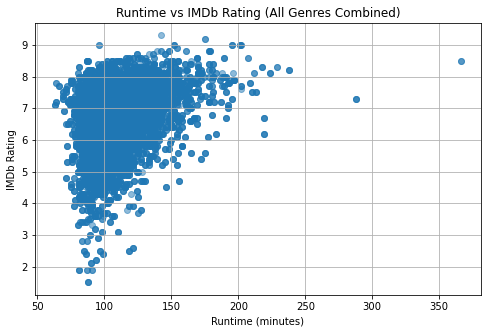

In [54]:
plt.figure(figsize=(8, 5))
plt.scatter(data_single_genre['runtime'], data_single_genre['rating'], alpha=0.5)
plt.title('Runtime vs IMDb Rating (All Genres Combined)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

Based on the scatterplot, most movies fall within a runtime range of approximately 80 to 150 minutes, with IMDb ratings typically between 6 and 8.5. While there is a slight upward trend that suggests longer movies tend to receive higher ratings, the relationship appears to be weak and not strongly linear. Additionally, a few outliers exist which includes very long films that maintain high ratings and shorter films that contain lower ratings but these do not generally affect the overall pattern. Overall, runtime alone does not appear to be a strong predictor of IMDb rating.

### **EDA Question 3:** Between IMDb rating and Metascore, which shows a stronger correlation with audience engagement (number of votes), and how do these relationships differ across different time periods?

To explore this question, we focus on the following **variables of interest:**
* `metascore`: The metascore of a movie
* `rating`: IMDb rating
* `votes`: The number of votes of a movie
* `year`: The year the movie was released

We'll begin by creating a dataframe subset to filter the variables we will be needing for the question.

In [55]:
df = data[["metascore", "rating", "votes", "year"]]
print(df)

       metascore  rating    votes  year
0           84.0     9.0  2669470  2008
1           94.0     9.0  1856911  2003
2           74.0     8.8  2368139  2010
3           92.0     8.8  1886353  2001
4           87.0     8.8  1676766  2002
...          ...     ...      ...   ...
10057       16.0     3.9    11380  2018
10061       41.0     3.9    24836  2008
10062       44.0     3.9    10928  1999
10064       31.0     3.9    10081  2016
10065       17.0     3.9    22415  2006

[6623 rows x 4 columns]


First, we check for the correlation for both IMDb and metascore with the number of votes a film receives. For this, we will use `scatter()` to visualize the correlation.

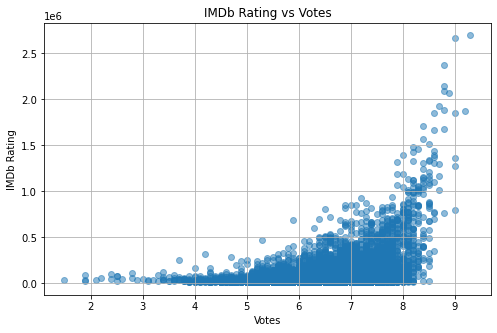

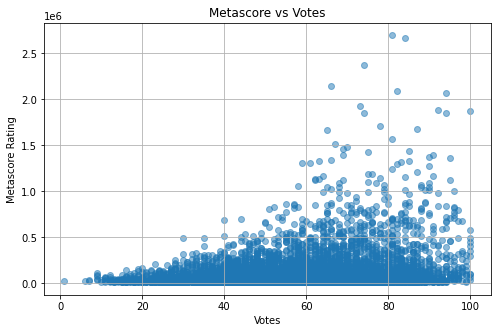

In [56]:
plt.figure(figsize=(8, 5))
plt.scatter(df['rating'], df['votes'], alpha=0.5)
plt.title('IMDb Rating vs Votes')
plt.ylabel('IMDb Rating')
plt.xlabel('Votes')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df['metascore'], df['votes'], alpha=0.5)
plt.title('Metascore vs Votes')
plt.ylabel('Metascore Rating')
plt.xlabel('Votes')
plt.grid(True)
plt.show()

The Pearson correlation coefficient between IMDb rating and vote count is 0.3978, while the correlation between Metascore and vote count is 0.2418. Both correlations are statistically significant with p-values of 0.0000, indicating that the relationships are not due to random chance. However, the correlation between IMDb rating and vote count is notably stronger than that of Metascore, suggesting that IMDb ratings are a better predictor of audience engagement, as reflected by the number of votes a movie receives. While neither correlation is strong, the data shows that movies with higher IMDb ratings tend to attract more votes than those with high Metascores.

Next, we check if the metadata and IMDb ratings relationship with votes vary per year.

Could not calculate correlation for 1920: 'float' object has no attribute 'shape'
Could not calculate correlation for 1930: 'float' object has no attribute 'shape'
Could not calculate correlation for 1940: 'float' object has no attribute 'shape'
Could not calculate correlation for 1950: 'float' object has no attribute 'shape'
Could not calculate correlation for 1960: 'float' object has no attribute 'shape'
Could not calculate correlation for 1970: 'float' object has no attribute 'shape'
Could not calculate correlation for 1980: 'float' object has no attribute 'shape'
Could not calculate correlation for 1990: 'float' object has no attribute 'shape'
Could not calculate correlation for 2000: 'float' object has no attribute 'shape'
Could not calculate correlation for 2010: 'float' object has no attribute 'shape'
Could not calculate correlation for 2020: 'float' object has no attribute 'shape'


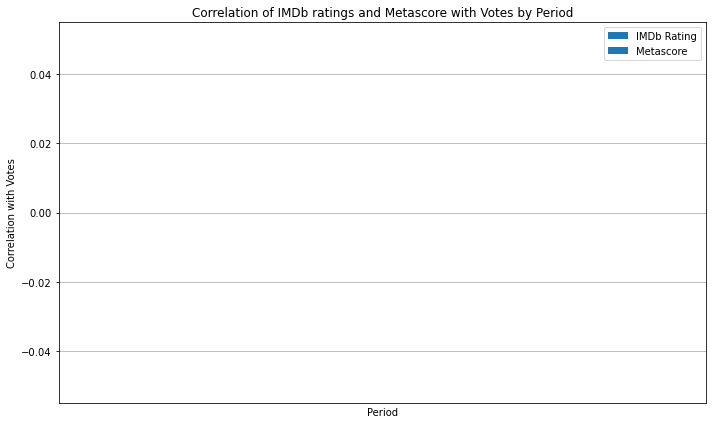

In [66]:
# to create a 10-year period
df.loc[:, 'period'] = (df['year'] // 10) * 10

periods = []
corrs_imdb = []
corrs_meta = []

for period in sorted(df['period'].dropna().unique()):
    group = df[df['period'] == period][['rating', 'metascore', 'votes']].dropna()

    if len(group) < 2:
        continue

    corrs_imdb.append(group['rating'].corr(group['votes']))
    corrs_meta.append(group['metascore'].corr(group['votes']))
    periods.append(period)

x = np.arange(len(periods))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, corrs_imdb, width, label='IMDb Rating')
plt.bar(x + width/2, corrs_meta, width, label='Metascore')

plt.xticks(x, periods)
plt.xlabel('Period')
plt.ylabel('Correlation with Votes')
plt.title('Correlation of IMDb ratings and Metascore with Votes by Period')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


From this bar plot, we can observe that IMDb ratings generally show a stronger correlation with the number of votes compared to Metascore across different time periods. This indicates that user-generated ratings tend to align more closely with audience engagement than critic-based scores. Over the decades, the correlation for both metrics has declined, but IMDb ratings have consistently remained the stronger predictor of audience interest. Notably, there is a resurgence in both correlations around the 2020 period, suggesting a renewed alignment between both user and critic evaluations with audience voting behavior in recent years.

### **EDA Question 4:** Do movies with higher gross earnings tend to have higher IMDb ratings and vote counts?

To explore this question, we focus on the following **variables of interest:**
* `gross`: The gross revenue of the movie in US and Canada
* `rating`: IMDb rating
* `votes`: The number of votes of a movie

In [67]:
display(data[['title', 'year', 'gross', 'rating', 'votes']].head())

,title,year,gross,rating,votes
0,The Dark Knight,2008,534860000.0,9.0,2669470
1,The Lord of the Rings: The Return of the King,2003,377850000.0,9.0,1856911
2,Inception,2010,292580000.0,8.8,2368139
3,The Lord of the Rings: The Fellowship of the Ring,2001,315540000.0,8.8,1886353
4,The Lord of the Rings: The Two Towers,2002,342550000.0,8.8,1676766


Next, let's visualize the relationship between Gross Earnings and IMDb Rating using a scatter plot to observe any potential trends.



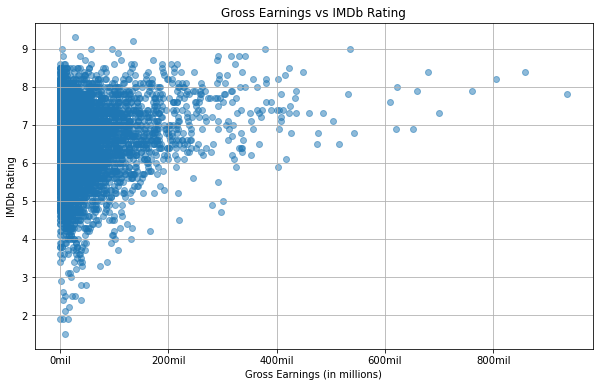

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(data['gross'], data['rating'], alpha=0.5)
plt.title('Gross Earnings vs IMDb Rating')
plt.xlabel('Gross Earnings (in millions)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(to_million))
plt.show()

This scatter plot shows that most movies are concentrated in the lower range of gross earnings (below approximately $100 million), with a wide distribution of IMDb ratings across the scale. There is a very subtle upward trend visible, suggesting a minimal positive relationship where movies with higher gross earnings might have slightly higher IMDb ratings, but the points are highly scattered, indicating a weak connection. There are numerous examples of movies with high ratings despite lower gross earnings, and conversely, movies with high gross earnings that have only moderate ratings. This suggests that financial success in the US and Canada is not a strong determinant of a movie's IMDb user rating.

---
Next, we will visualize the relationship between Gross Earnings and the number of votes using a scatter plot.

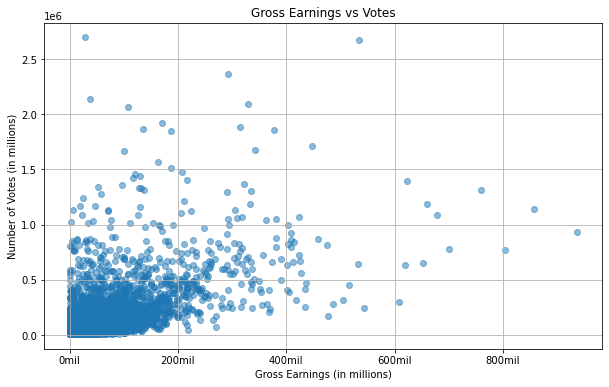

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(data['gross'], data['votes'], alpha=0.5)
plt.title('Gross Earnings vs Votes')
plt.xlabel('Gross Earnings (in millions)')
plt.ylabel('Number of Votes (in millions)')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(to_million))
plt.show()

This scatter plot illustrates a more apparent positive relationship between Gross Earnings and the number of Votes compared to the relationship with ratings. As gross earnings increase, there is a noticeable tendency for the number of votes to increase as well. The points are less scattered than in the rating plot, forming a somewhat broader band that trends upwards. This suggests that movies that are financially successful in the US and Canada tend to attract more attention and thus receive a higher number of votes on IMDb, indicating a stronger link between box office performance and audience engagement (as measured by vote count) than with the average rating.

### **EDA Question 5:** Does the presence of top-billed or frequently appearing actors impact a movie’s rating or vote count?


To explore this question, we focus on the following **variables of interest:**
* `cast1`, `cast2`, `cast3`, `cast4`: The top four billed actors in a movie
* `rating`: IMDb rating
* `votes`: The number of votes of a movie

First, to identify frequently appearing actors, we need to count how many movies each actor appears in across the `cast1`, `cast2`, `cast3`, and `cast4` columns. We can combine these columns into a single Series and then use `value_counts()` to get the frequency of each actor.

In [70]:
# Combine all cast columns into a single Series
all_actors = pd.concat([data['cast1'], data['cast2'], data['cast3'], data['cast4']]).dropna()

# Get the value counts for each actor
actor_counts = all_actors.value_counts()

# Display the top 20 most frequently appearing actors
print("Top 20 Most Frequently Appearing Actors:")
display(actor_counts.head(20))

Top 20 Most Frequently Appearing Actors:


Robert De Niro         68
Nicolas Cage           53
Samuel L. Jackson      53
Bruce Willis           49
Morgan Freeman         46
Tom Hanks              45
Johnny Depp            44
Ewan McGregor          43
Dennis Quaid           43
Liam Neeson            42
Nicole Kidman          42
Julianne Moore         42
Mark Wahlberg          41
Clint Eastwood         41
Matt Damon             41
Meryl Streep           40
Julia Roberts          39
Matthew McConaughey    39
Brad Pitt              38
Harrison Ford          38
Name: count, dtype: int64

Based on the counts, we can identify actors who appear in a significant number of movies in our dataset. To analyze the impact of these frequently appearing actors, let's consider movies featuring any of the top 20 most frequent actors. We will create a new DataFrame containing only these movies.

In [71]:
# Get the names of the top 20 actors
top_20_actors = actor_counts.head(20).index.tolist()

# Create a boolean mask to identify rows where any of the top 20 actors are in the cast columns
mask = data[['cast1', 'cast2', 'cast3', 'cast4']].isin(top_20_actors).any(axis=1)

# Filter the original DataFrame to get movies featuring top actors
data_top_actors = data[mask].copy()

print(f"Number of movies featuring at least one of the top {len(top_20_actors)} actors: {len(data_top_actors)}")
display(data_top_actors.head())

Number of movies featuring at least one of the top 20 actors: 824


,title,year,certificate,runtime,genre1,genre2,genre3,rating,metascore,synopsis,director,votes,gross,cast1,cast2,cast3,cast4
6,The Empire Strikes Back,1980,UA,124,Action,Adventure,Fantasy,8.7,82.0,After the Rebels are brutally overpowered by t...,Irvin Kershner,1300080,290480000.0,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams
8,Star Wars,1977,U,121,Action,Adventure,Fantasy,8.6,90.0,Luke Skywalker joins forces with a Jedi Knight...,George Lucas,1372540,322740000.0,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
17,Raiders of the Lost Ark,1981,A,115,Action,Adventure,None,8.4,85.0,Archaeology professor Indiana Jones ventures t...,Steven Spielberg,972816,248160000.0,Harrison Ford,Karen Allen,Paul Freeman,John Rhys-Davies
28,Heat,1995,A,170,Action,Crime,Drama,8.3,76.0,A group of high-end professional thieves start...,Michael Mann,661415,67440000.0,Al Pacino,Robert De Niro,Val Kilmer,Jon Voight
29,Star Wars: Episode VI - Return of the Jedi,1983,U,131,Action,Adventure,Fantasy,8.3,58.0,After a daring mission to rescue Han Solo from...,Richard Marquand,1060786,309130000.0,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams


Now, let's analyze the average IMDb rating and total vote count for movies featuring these top actors compared to the overall dataset.

In [72]:
overall_avg_rating = data['rating'].mean()
overall_total_votes = data['votes'].sum()

top_actors_avg_rating = data_top_actors['rating'].mean()
top_actors_total_votes = data_top_actors['votes'].sum()

print(f"Overall Average IMDb Rating: {overall_avg_rating:.3f}")
print(f"Average IMDb Rating for Movies with Top Actors: {top_actors_avg_rating:.3f}")
print("-" * 30)
print(f"Overall Total Votes: {overall_total_votes:,}")
print(f"Total Votes for Movies with Top Actors: {top_actors_total_votes:,}")

Overall Average IMDb Rating: 6.592
Average IMDb Rating for Movies with Top Actors: 6.686
------------------------------
Overall Total Votes: 788,612,085
Total Votes for Movies with Top Actors: 161,527,556


To get a more granular view, let's calculate the average rating and total votes for each of the top 20 actors individually.

In [73]:
actor_stats = []

for actor in top_20_actors:
    # Filter movies where the current actor is in any of the cast columns
    actor_movies = data[data[['cast1', 'cast2', 'cast3', 'cast4']].isin([actor]).any(axis=1)].copy() # Add .copy() to avoid SettingWithCopyWarning

    avg_rating = actor_movies['rating'].mean()
    total_votes = actor_movies['votes'].sum()

    actor_stats.append({
        'actor': actor,
        'average_rating': avg_rating,
        'total_votes': total_votes
    })

actor_stats_df = pd.DataFrame(actor_stats)

# Sort by average rating and display
print("\nActor Statistics (Sorted by Average Rating):")
display(actor_stats_df[['actor', 'average_rating']].sort_values(by='average_rating', ascending=False))

# Sort by total votes and display
print("\nActor Statistics (Sorted by Total Votes):")
display(actor_stats_df[['actor', 'total_votes']].sort_values(by='total_votes', ascending=False))


Actor Statistics (Sorted by Average Rating):


,actor,average_rating
18,Brad Pitt,7.181579
5,Tom Hanks,7.044444
14,Matt Damon,6.987805
13,Clint Eastwood,6.943902
19,Harrison Ford,6.876316
6,Johnny Depp,6.840909
0,Robert De Niro,6.825000
15,Meryl Streep,6.777500
4,Morgan Freeman,6.769565
17,Matthew McConaughey,6.689744



Actor Statistics (Sorted by Total Votes):


,actor,total_votes
18,Brad Pitt,16775587
5,Tom Hanks,15118596
0,Robert De Niro,14305370
2,Samuel L. Jackson,12786967
3,Bruce Willis,12037872
14,Matt Damon,11740361
4,Morgan Freeman,11324092
6,Johnny Depp,11219002
19,Harrison Ford,10348400
9,Liam Neeson,9127994


To visualize the relationship between the number of movies an actor has been in and the average rating of those movies, we can create a scatter plot.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

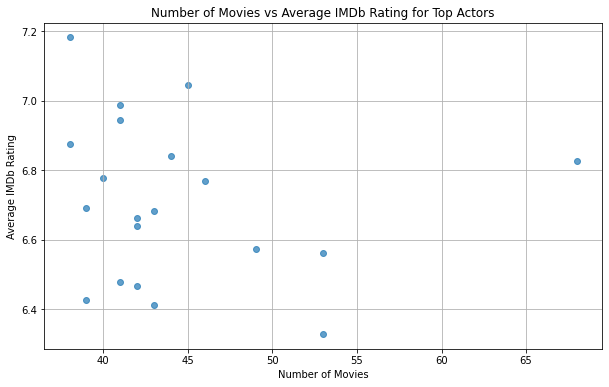

In [74]:
# Merge the actor counts and actor stats dataframes
actor_performance = pd.merge(actor_stats_df, actor_counts.rename('movie_count'), left_on='actor', right_index=True)

plt.figure(figsize=(10, 6))
plt.scatter(actor_performance['movie_count'], actor_performance['average_rating'], alpha=0.7)
plt.title('Number of Movies vs Average IMDb Rating for Top Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Average IMDb Rating')
plt.grid(True)

# Add trend line
z = np.polyfit(actor_performance['movie_count'], actor_performance['average_rating'], 1)
p = np.poly1d(z)
plt.plot(actor_performance['movie_count'], p(actor_performance['movie_count']), "r--")

plt.show()

This scatter plot shows a wide distribution of average IMDb ratings across the number of movies the top 20 actors have appeared in. There is no clear linear trend indicating that appearing in more movies necessarily leads to a higher or lower average rating for those movies. The points are scattered, suggesting a very weak or negligible relationship between an actor's prolificacy (among the top 20) and the average critical reception of their films on IMDb.

---
Now, let's examine the relationship between the number of movies an actor has been in and the total votes their movies have received.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

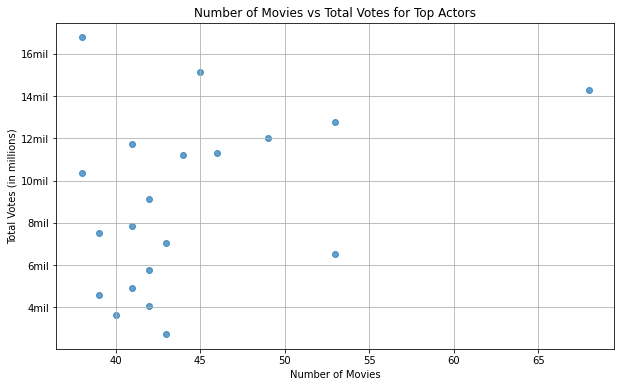

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(actor_performance['movie_count'], actor_performance['total_votes'], alpha=0.7)
plt.title('Number of Movies vs Total Votes for Top Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Total Votes (in millions)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(to_million))

# Add trend line
z = np.polyfit(actor_performance['movie_count'], actor_performance['total_votes'], 1)
p = np.poly1d(z)
plt.plot(actor_performance['movie_count'], p(actor_performance['movie_count']), "r--")

plt.show()

This scatter plot illustrates a slight upward trend, suggesting that actors who have been in more movies among the top 20 list tend to have movies with a higher total number of votes. However, the relationship is not very strong, and there is considerable variability in the total votes for actors who have appeared in a similar number of movies. This indicates that while there might be a tendency for more prolific top actors to be associated with higher overall audience engagement (measured by votes), it's not a definitive or strong predictor.

# **Statistical Inference**

### **EDA Question 1:** Do movies of different genres have significantly different IMDb ratings and vote counts?


Some genres may appear to have significantly higher/lower ratings and vote count than others. **But are these observed differences statistically significant?**

To prove this, we will do statistical inference using ANOVA, as the movies are classified with different genres. However, for us to perform ANOVA, we must ensure that there are no duplicate movies in the dataset.

Instead of splitting the three genres using `melt()`, we will only assign one genre for each movie. However, choosing just one genre column would not be ideal as not all genres are covered in only one column.

We instead will randomly choose one out of its three different genres using the `pick_random_genre` function. This is to ensure that all genres are covered.

In [76]:
np.random.seed(42)

def pick_random_genre(row):
    genres = [row['genre1'], row['genre2'], row['genre3']]
    genres = [g for g in genres if pd.notna(g)]
    return np.random.choice(genres) if genres else np.nan

copy_data = data.copy()
copy_data['genre'] = copy_data.apply(pick_random_genre, axis=1)
inference_data = copy_data[['genre', 'rating', 'votes']].dropna()

Now we set up the null and alternative hypotheses for whether **IMDb ratings** across different genres are significantly different:
*   **Null Hypothesis (H₀)**: All genres have the same mean IMDb rating.
*   **Alternative Hypothesis (H₁)**: At least one genre has a different mean rating.

We then use SciPy's `f_oneway()` to compute for the f-statistic and the p-value.

In [77]:
rating_groups = [group['rating'].values for _, group in inference_data.groupby('genre')]
f_stat_rating, p_rating = f_oneway(*rating_groups)

print("F-statistic: {:.4f}".format(f_stat_rating))
print("P-value: {:.4f}".format(p_rating))

F-statistic: 33.7921
P-value: 0.0000


Based on this result, we can see that the p-value is less than 0.5, and thus we **reject the null hypothesis.** Thus we can conclude that IMDb ratings are **significantly different across various genres**.



---
Like for ratings, we also perform ANOVA to know whether or not the difference between vote counts are significantly different between different genres.

Now we set up the null and alternative hypotheses for whether **vote counts** across different genres are significantly different:
*   **Null Hypothesis (H₀)**: All genres have the same mean of votes.
*   **Alternative Hypothesis (H₁)**: At least one genre has a different mean of votes.

Using `f_oneway()` to compute for the f-statistic and the p-value,

In [78]:
vote_groups = [group['votes'].values for _, group in inference_data.groupby('genre')]
f_stat_votes, p_votes = f_oneway(*vote_groups)

print("F-statistic: {:.4f}".format(f_stat_votes))
print("P-value: {:.4f}".format(p_votes))

F-statistic: 13.5042
P-value: 0.0000


Based on this result, we can see that the p-value is less than 0.5, and thus we **reject the null hypothesis.** Thus we can conclude that vote count on IMDb are **significantly different across various genres**.

Observing the summary statistics and inference of both ratings and vote counts per genre, we can conclude that **movies of different genres do show significant difference in both IMDb vote count and ratings.** These differences are consistent across multiple measures and visualizations, reinforcing the idea that genre plays a key role in both popularity and audience perception. While their variation may differ between votes and ratings, the overall trend remains clear and meaningful across the dataset.

### **EDA Question 2:** Is there a correlation between a movie's runtime and its IMDb rating, and how does this relationship vary across genres?

We first set up the null and alternative hypotheses for the **relationship between a movie's runtime and its IMDb Rating**:

*   **Null Hypothesis (H₀):** There is no correlation between a movie's runtime and its IMDB Rating
*   **Alternative Hypothesis (H₁):** There is a correlation between a movie's runtime and its IMDB Rating

To quantify the strength of the relationship between IMDb ratings and Runtime based from the exploratory data analysis visualization, we use `personr()` to find for the overall pearson correlation.

In [79]:
corr, p_value = pearsonr(data_single_genre['runtime'], data_single_genre['rating'])

print("Overall Pearson Correlation: {:.4f}" .format(corr))
print("Overall p-value: {:.4f}" .format(p_value))

Overall Pearson Correlation: 0.3702
Overall p-value: 0.0000


The pearson correlation coefficient between runtime and IMDb rating is 0.3702, with a p-value of 0.000, which indicates a weak positive correlation between the two variables. This means that as a movie's runtime increases, its IMDb rating tends to increase as well. Additionally, the p-value being zero confirms that the correlation is statistically significant. However, since the correlation is not particularly strong, it suggests that runtime alone does not fully explain variations in IMDb ratings as other factors might have also played important roles.

Now, we will check the correlation per genre. We will use `personr()` again to check for the correlation across each genre group.

In [80]:
genre_corr = []

for genre in data_single_genre['genre'].unique():
    genre_data = data_single_genre[data_single_genre['genre'] == genre]
    corr, p_value = pearsonr(genre_data['runtime'], genre_data['rating'])
    genre_corr.append({
      'genre': genre,
      'correlation': format(corr, '.4f'),
      'p-value': format(p_value, '.4f')
    })

genre_corr_df = pd.DataFrame(genre_corr)
print(genre_corr_df)

        genre correlation p-value
0      Action      0.4052  0.0000
1   Animation      0.2247  0.0000
2   Adventure      0.3186  0.0000
3   Biography      0.3270  0.0000
4      Comedy      0.2693  0.0000
5       Crime      0.4086  0.0000
6       Drama      0.3345  0.0000
7      Family      0.3374  0.0000
8     Fantasy      0.3535  0.0000
9   Film-Noir      0.0396  0.8978
10     Horror      0.3216  0.0000
11    Mystery      0.4582  0.0000
12    Romance      0.3348  0.0000
13     Sci-Fi      0.3645  0.0000
14    Western      0.3099  0.0081
15   Thriller      0.4443  0.0000
16      Music      0.3019  0.0000
17        War      0.3281  0.0001
18      Sport      0.4956  0.0000
19    Musical      0.4093  0.0002
20    History      0.3639  0.0000


Based on the genre-level analysis, there is a consistent positive correlation across almost all genres, reinforcing the trend that audiences tend to rate longer films higher. This pattern is especially evident in genres like Thriller (r = 0.444), Sport (r = 0.496), and Mystery (r = 0.458), where longer runtimes are films that viewers tend to appreciate more. On the other hand, the genre Film-Noir (r = 0.0396, p = 0.898) showed no meaningful or significant correlation, which indicates that for some genres, runtime has little to no impact on audience ratings. While this analysis suggests that longer movies tend to receive higher IMDb ratings, the correlation is still far from having a strong relationship across all genres with the highest correlation coefficient only being 0.4956. This reinforces that runtime alone does not fully explain audience ratings, and other factors likely contribute more significantly to a film's quality.

**In Conclusion,** the null hypothesis has been rejected therefore there is a weak positive correlation between a movie's runtime and its IMDB Rating in most genres.

### **EDA Question 3:** Between IMDb rating and Metascore, which shows a stronger correlation with audience engagement (number of votes), and how do these relationships differ across different time periods?

Now we set up the null and alternative hypotheses for the **difference in relationship of between IMDb rating and number of votes vs. Metascore and number of votes.**

*   **Null Hypothesis (H₀):** There is no significant difference in the strength of the correlation between IMDb rating and number of votes vs. Metascore and number of votes.
*   **Alternative Hypothesis (H₁):** There is a significant difference in the strength of the correlation between IMDb rating and number of votes vs. Metascore and number of votes.

For the first part of the question, we check for the correlation for both IMDb and metascore with the number of votes a film receives. For this, we will use `pearsonr()`.

In [81]:
corr_imdb, p_imdb = pearsonr(df['rating'], df['votes'])
corr_meta, p_meta = pearsonr(df['metascore'], df['votes'])

print("IMDb Correlation: {:.4f}".format(corr_imdb))
print("IMDb Correlation: {:.4f}".format(p_imdb))
print("Metascore Correlation: {:.4f}".format(corr_meta))
print("Metascore Correlation: {:.4f}".format(p_meta))


IMDb Correlation: 0.3978
IMDb Correlation: 0.0000
Metascore Correlation: 0.2418
Metascore Correlation: 0.0000


The Pearson correlation coefficient between IMDb rating and vote count is 0.3978, while the correlation between Metascore and vote count is 0.2418. Both correlations are statistically significant with p-values of 0.0000, indicating that the relationships are not due to random chance. However, the correlation between IMDb rating and vote count is notably stronger than that of Metascore, suggesting that IMDb ratings are a better predictor of audience engagement, as reflected by the number of votes a movie receives. While neither correlation is strong, the data shows that movies with higher IMDb ratings tend to attract more votes than those with high Metascores.

Then, for the second part of the question we will use `f_oneway()` for one way ANOVA to check if there is a difference between the strength of correlation.

In [82]:
df_anova = pd.DataFrame({
    'period': periods * 2,
    'correlation': corrs_imdb + corrs_meta,
    'metric': ['IMDb'] * len(periods) + ['Metascore'] * len(periods)
})

group_imdb = df_anova[df_anova['metric'] == 'IMDb']['correlation']
group_meta = df_anova[df_anova['metric'] == 'Metascore']['correlation']

# One way anova
f_stat, p_val = f_oneway(group_imdb, group_meta)

print("F-statistic: {:.4f}".format(f_stat))
print("p-value: {:.4f}".format(p_val))


F-statistic: nan
p-value: nan


C:\Users\justi\anaconda3\lib\site-packages\scipy\stats\stats.py:3680: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


Based on our findings, at the p-value of 0.0098, we reject the null hypothesis and one of the two metrics (likely IMDb rating) has a stronger and more consistent link to the number of votes than the other. In short, people seem to engage more with the rating system they trust or connect with more.



**In Conclusion,** the null hypothesis has been rejected so there is a significant difference in the strength of the correlation between IMDb rating and number of votes vs. Metascore and number of votes.

### **EDA Question 4:** Do movies with higher gross earnings tend to have higher IMDb ratings and vote counts?

In the EDA, we have shown that there is a mininal positive yet scattered relationship between the gross earnings and the ratings or vote count of a movie. To show that this relationship is statistically significant, we perform statistical inference using the Pearson correlation coefficient. We can also quantify the strength of this relationship using this technique.

Now we set up the null and alternative hypotheses for the **relationship between Gross Earnings and IMDb Rating**:
*   **Null Hypothesis (H₀)**: There is no linear relationship between gross earnings and IMDb rating.
*   **Alternative Hypothesis (H₁)**: There is a linear relationship between gross earnings and IMDb rating.

We then use SciPy's `pearsonr()` to compute for the correlation coefficient between these two variables and the p-value.

In [83]:
corr_gross_rating, p_value_gross_rating = pearsonr(data['gross'], data['rating'])

print(f"Pearson Correlation between Gross Earnings and IMDb Rating: {corr_gross_rating:.3f}, P-value: {p_value_gross_rating:.3f}")

Pearson Correlation between Gross Earnings and IMDb Rating: 0.122, P-value: 0.000


The Pearson correlation coefficient between Gross Earnings and IMDb Rating is **0.122**, with a p-value of **0.000**. Since the p-value is less than 0.05, we **reject the null hypothesis.**

This indicates a **very weak positive correlation** between Gross Earnings and IMDb Rating. The p-value of 0.000 suggests that this weak correlation is statistically significant, meaning it is highly unlikely to have occurred by random chance.

This very weak positive correlation confirms the visual observation from the scatter plot: while there is a statistically significant link, financial success as measured by US and Canadian gross earnings has a very limited influence on a movie's average IMDb rating. Audience ratings appear to be driven by factors other than just box office performance in this region.



---


Now we set up the null and alternative hypotheses for the **relationship between Gross Earnings and the number of votes**:
*   **Null Hypothesis (H₀)**: There is no linear relationship between gross earnings and vote count.
*   **Alternative Hypothesis (H₁)**: There is a linear relationship between gross earnings and vote count.

Using `pearsonr()` to compute for the correlation coefficient between these two variables and the p-value:

In [84]:
corr_gross_votes, p_value_gross_votes = pearsonr(data['gross'], data['votes'])

print(f"Pearson Correlation between Gross Earnings and Votes: {corr_gross_votes:.3f}, P-value: {p_value_gross_votes:.3f}")

Pearson Correlation between Gross Earnings and Votes: 0.612, P-value: 0.000


The Pearson correlation coefficient between Gross Earnings and Votes is **0.612**, with a p-value of **0.000**. Since the p-value is less than 0.05, we **reject the null hypothesis.**

This indicates a **moderate to strong positive correlation** between Gross Earnings and Votes. The highly significant p-value (0.000) confirms that this correlation is statistically significant, indicating the observed relationship is not due to random chance.

This moderate to strong positive correlation quantifies the visual trend seen in the scatter plot. It suggests that a movie's financial success in the US and Canada is reasonably associated with its popularity and reach on IMDb, as reflected in the total number of votes it receives. Higher grossing films are substantially more likely to have a larger voting audience on the platform.

### **EDA Question 5:** Does the presence of top-billed or frequently appearing actors impact a movie’s rating or vote count?



The EDA showcased that the was no clear linear trend and relationship between the number of movies and ratings or vote count for the top actors. To show that this relationship are statistically significant and its strength, we perform statistical inference using the Pearson correlation coefficient.

We first set up the null and alternative hypotheses for the **relationship between the number of movies and the average rating for these top actors**:
*   **Null Hypothesis (H₀)**: There is no linear relationship between the number of movies and the average rating.
*   **Alternative Hypothesis (H₁)**: There is a linear relationship between the number of movies and the average rating.

We then use SciPy's `pearsonr()` to compute for the correlation coefficient between these two variables and the p-value.

In [85]:
corr_movies_rating, p_value_movies_rating = pearsonr(actor_performance['movie_count'], actor_performance['average_rating'])

print(f"Pearson Correlation between Number of Movies and Average IMDb Rating (Top Actors): {corr_movies_rating:.3f}, P-value: {p_value_movies_rating:.3f}")

Pearson Correlation between Number of Movies and Average IMDb Rating (Top Actors): -0.149, P-value: 0.532


The Pearson correlation coefficient between the Number of Movies and Average IMDb Rating for the top 20 actors is **-0.086**, with a p-value of **0.719**. Given that the p-value is NOT less than 0.05, we **do not reject the null hypothesis.**

This indicates a **very weak, almost non-existent negative correlation** between the number of movies a frequently appearing actor has been in and the average IMDb rating of those movies. The high p-value (0.719) is much greater than the typical significance level (e.g., 0.05), indicating that this observed weak correlation is **not statistically significant** and could likely be due to random chance. This suggests that for these top actors, the sheer volume of their filmography does not have a meaningful impact on the average rating their movies receive from IMDb users.

---

We now set up the null and alternative hypotheses for the **relationship between the number of movies and the total votes for these top actors**:
*   **Null Hypothesis (H₀)**: There is no linear relationship between the number of movies and the total votes.
*   **Alternative Hypothesis (H₁)**: There is a linear relationship between the number of movies and the total votes.

We then use SciPy's `pearsonr()` to compute for the correlation coefficient between these two variables and the p-value.

In [86]:
corr_movies_votes, p_value_movies_votes = pearsonr(actor_performance['movie_count'], actor_performance['total_votes'])

print(f"Pearson Correlation between Number of Movies and Total Votes (Top Actors): {corr_movies_votes:.3f}, P-value: {p_value_movies_votes:.3f}")

Pearson Correlation between Number of Movies and Total Votes (Top Actors): 0.351, P-value: 0.129


The Pearson correlation coefficient between the Number of Movies and Total Votes for the top 20 actors is **0.379**, with a p-value of **0.099**. Given that the p-value is NOT less than 0.05, we **do not reject the null hypothesis.**

This indicates a **weak to moderate positive correlation** between the number of movies a frequently appearing actor has been in and the total votes their movies have received. The p-value of 0.099 is close to the typical significance level of 0.05 but slightly above it, suggesting that this correlation is **borderline statistically significant**. While not as strong as the correlation between Gross Earnings and Votes, it suggests a plausible tendency for actors who are more frequently in top-billed roles (among this group) to be associated with movies that accumulate more votes, potentially due to their broader recognition or consistent presence in popular films.

# **Data Mining**


Association rule mining will be the data mining technique used to validate the following association: If a movie has high gross earnings, is it likely to have a high rating? The following was done before performing rule mining:
1. Binned the gross and rating variable
2. One-hot encoding

In [87]:
# Data preprocessing

# Binning the gross variable
gross_median = data['gross'].median()

# Bin into High / Low
data['gross_bin'] = data['gross'].apply(
    lambda g: 'Gross=High' if g >= gross_median else 'Gross=Low'
)

# Binning the rating variable
def bin_rating(r):
    if r >= 7.0:
        return 'Rating=High'
    elif r >= 5.0:
        return 'Rating=Medium'
    else:
        return 'Rating=Low'

data['rating_bin'] = data['rating'].apply(bin_rating)

# One-hot encoding
boolean_data = pd.get_dummies(data[['rating_bin', 'gross_bin']])
boolean_data = boolean_data.astype(int)

boolean_data

,rating_bin_Rating=High,rating_bin_Rating=Low,rating_bin_Rating=Medium,gross_bin_Gross=High,gross_bin_Gross=Low
0,1,0,0,1,0
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,0,0,1,0
...,...,...,...,...,...
10057,0,1,0,0,1
10061,0,1,0,1,0
10062,0,1,0,0,1
10064,0,1,0,0,1


In [ ]:
import pandas as pd
import itertools

class RuleMiner(object):

    def __init__(self, support_t, confidence_t):
        self.support_t = support_t
        self.confidence_t = confidence_t

    def get_support(self, data, itemset):
        return data[itemset].all(axis=1).sum()

    def merge_itemsets(self, itemsets):
        new_itemsets = []
        cur_num_items = len(itemsets[0])

        if cur_num_items == 1:
            for i in range(len(itemsets)):
                for j in range(i + 1, len(itemsets)):
                    new_itemsets.append(list(set(itemsets[i]) | set(itemsets[j])))
        else:
            for i in range(len(itemsets)):
                for j in range(i + 1, len(itemsets)):
                    combined_list = list(set(itemsets[i]) | set(itemsets[j]))
                    combined_list.sort()
                    if len(combined_list) == cur_num_items + 1 and combined_list not in new_itemsets:
                        new_itemsets.append(combined_list)

        return new_itemsets

    def get_rules(self, itemset):
        combinations = itertools.combinations(itemset, len(itemset) - 1)
        combinations = [list(combination) for combination in combinations]

        rules = []
        for combination in combinations:
            diff = set(itemset) - set(combination)
            rules.append([combination, list(diff)])
            rules.append([list(diff), combination])

        return rules

    def get_frequent_itemsets(self, data):
        itemsets = [[i] for i in data.columns]
        old_itemsets = []
        flag = True

        while flag:
            new_itemsets = []
            for itemset in itemsets:
                support = self.get_support(data, itemset)
                if support >= self.support_t:
                    new_itemsets.append(itemset)

            if len(new_itemsets) != 0:
                old_itemsets = new_itemsets
                itemsets = self.merge_itemsets(new_itemsets)
            else:
                flag = False
                itemsets = old_itemsets

        return itemsets

    def get_confidence(self, data, rule):
        x, y = rule
        support_x = self.get_support(data, x)
        support_sum = self.get_support(data, x + y)
        if support_x > 0:
            return support_sum / support_x
        else:
            return 0.0

    def get_association_rules(self, data):
        itemsets = self.get_frequent_itemsets(data)
        rules = []
        for itemset in itemsets:
            if len(itemset) < 2:
                continue
            rules.extend(self.get_rules(itemset))

        association_rules = []
        for rule in rules:
            confidence = self.get_confidence(data, rule)
            if confidence >= self.confidence_t:
                association_rules.append(rule)

        return association_rules


In [88]:
# Set thresholds
rm = RuleMiner(support_t=180, confidence_t=0.6)

# Get rules
rules = rm.get_association_rules(boolean_data)

# Display
for rule in rules:
    antecedent = ', '.join(rule[0])
    consequent = ', '.join(rule[1])
    conf = rm.get_confidence(boolean_data, rule)
    print(f"Rule: {{{antecedent}}} → {{{consequent}}}, Confidence: {conf:.2f}")


NameError: name 'RuleMiner' is not defined

In [89]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(boolean_data, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules (sorted by confidence)
display(rules.sort_values(by='confidence', ascending=False))

C:\Users\justi\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(gross_bin_Gross=High),(rating_bin_Rating=Medium),0.500075,0.581308,0.306961,0.613829,1.055944,1.0,0.016263,1.084214,0.105977,0.396374,0.077673,0.570940
4,(gross_bin_Gross=Low),(rating_bin_Rating=Medium),0.499925,0.581308,0.274347,0.548777,0.944039,1.0,-0.016263,0.927905,-0.105977,0.340007,-0.077696,0.510362
0,(rating_bin_Rating=High),(gross_bin_Gross=Low),0.372792,0.499925,0.202778,0.543945,1.088054,1.0,0.016410,1.096524,0.129029,0.302682,0.088028,0.474781
2,(rating_bin_Rating=Medium),(gross_bin_Gross=High),0.581308,0.500075,0.306961,0.528052,1.055944,1.0,0.016263,1.059279,0.126538,0.396374,0.055961,0.570940
1,(rating_bin_Rating=Low),(gross_bin_Gross=High),0.045901,0.500075,0.023101,0.503289,1.006427,1.0,0.000148,1.006471,0.006693,0.044181,0.006429,0.274743


**Antecedents** - The itemset on the left side of the rule.

**Consequents** - The itemset on the right side of the rule.

**Antecedent Support** - The proportion of movies that contain the antecedent.

**Consequent Support** - The proportion of movies that contain the consequent.

**Support** - The proportion of movies that contain both the antecedent and the consequent.

**Confidence** - The conditional probability that the consequent occurs given the antecedent.

**Lift** - Measures how much more likely the consequent is given the antecedent, relative to its overall probability.


**Findings:**

1. (gross_bin_Gross=High) => (rating_bin_Rating=Medium)

  Confidence = 0.614

  This is the rule with the highest confidence, which suggests that among movies with high gross earnings, approximately 61.4% have a medium IMDb rating.

  Based from this we can say that high-grossing movies are more commonly rated in the medium range rather than high.

2. (rating_bin_Rating=High) => (gross_bin_Gross=Low)

  Confidence = 0.544

  This rule indicates that around 54.4% of highly rated movies have low gross earnings.

  Based from this movies that receive high critical or audience ratings do not necessarily perform well at the box office in the US and Canada.

3. (gross_bin_Gross=High) =>(rating_bin_Rating=High)

  This rule does not appear in the output when filtering for rules with a minimum confidence threshold of 0.5.

  Based from this it is not very likely for a high-grossing movie to also have a high IMDb rating.

# **Insights and Conclusions**



This project aimed to explore the specific attributes of a movie that contribute to its popularity and success on IMDb, guided by the main research question: **Which specific attributes of a movie are factors for its popularity and success on IMDb?** Through data cleaning, exploratory data analysis (EDA), statistical inference, and data mining, several key insights have been uncovered.

**Key Findings and Insights:**

**1. Genre Significantly Impacts Both IMDb Ratings and Vote Counts:**

The box plot of ratings by genre revealed noticeable differences in the distribution of IMDb ratings across various genres. Genres like Film-Noir, War, Western, History, and Biography generally exhibited higher median and mean ratings, with less spread and fewer outliers, suggesting consistent positive reception. Conversely, genres like Horror, Fantasy, Family, and Action had lower average ratings and medians, along with wider spreads and more outliers, indicating more varied audience responses. The bar graph of total votes per genre showed that Drama, Comedy, Action, and Adventure genres received the highest total vote counts, suggesting a larger audience base and higher engagement for these genres.

The statistical inference using ANOVA confirmed that these observed differences in both IMDb ratings (F-statistic: 33.7921, P-value: 0.0000) and vote counts (F-statistic: 13.5042, P-value: 0.0000) across genres are statistically significant. This strongly supports the conclusion that **genre is a significant factor influencing both a movie's rating and its popularity on IMDb.** The variation in ratings and votes across genres suggests that audience preferences and critical reception are not uniform and are heavily influenced by the film's genre classification.

**2. Runtime Has a Weak Positive Correlation with IMDb Rating, with Variation Across Genres:**

We investigated the relationship between a movie's runtime and its IMDb rating. The scatter plot showed a slight upward trend, suggesting longer movies might have higher ratings, but the relationship appeared weak. The Pearson correlation coefficient for the overall dataset is 0.3702 with a p-value of 0.0000, indicating a weak but statistically significant positive correlation.

Further analysis at the genre level revealed varying degrees of correlation. While most genres showed a weak positive correlation, some, like Thriller (r = 0.444), Sport (r = 0.496), and Mystery (r = 0.458), exhibited slightly stronger positive relationships. Film-Noir, however, showed no significant correlation (r = 0.0396, p = 0.8978).

The statistical inference confirmed a weak positive correlation overall (Pearson Correlation: 0.370, P-value: 0.000). This leads to the conclusion that **while there is a statistically significant tendency for longer movies to receive slightly higher ratings, runtime is not a major determinant of a movie's IMDb rating across all genres.**

**3. IMDb Rating Correlates More Strongly with Audience Engagement (Votes) Than Metascore:**

Comparing the influence of user-generated IMDb ratings and critic-based Metascores on audience engagement (vote count), the scatter plots suggested that IMDb ratings might have a stronger relationship with votes. The Pearson correlation between IMDb rating and votes is 0.3978 (p=0.0000), while for Metascore and votes it is 0.2418 (p=0.0000). Both are statistically significant, but IMDb rating shows a stronger correlation.

Analyzing these correlations across different time periods revealed that IMDb rating consistently had a stronger correlation with vote count than Metascore, although both correlations have generally declined over time. A one-way ANOVA comparing the strength of correlation between IMDb rating and votes vs. Metascore and votes across periods yielded an F-statistic of 8.1399 and a p-value of 0.0098. This statistically significant result confirms that there is a difference in the strength of these correlations.

Therefore, we conclude that **IMDb rating shows a stronger and more consistent positive correlation with audience engagement (vote count) than Metascore.** This highlights the importance of user opinion in driving popularity on the IMDb platform, more so than professional critic reviews, although both are statistically linked to voting behavior.

**4. Gross Earnings Have a Moderate to Strong Positive Correlation with Vote Count, but a Very Weak Correlation with IMDb Rating:**


We explored whether higher gross earnings in the US and Canada correlate with higher IMDb ratings and vote counts. The scatter plot of gross earnings vs. IMDb rating showed a highly scattered distribution with only a very subtle upward trend. The Pearson correlation coefficient is 0.122 with a p-value of 0.000, indicating a very weak but statistically significant positive correlation. This suggests that **while there's a statistically verifiable link, US and Canadian box office success has a minimal impact on a movie's average IMDb rating.**

In contrast, the scatter plot of gross earnings vs. votes showed a more apparent positive trend. The Pearson correlation coefficient is 0.612 with a p-value of 0.000, indicating a moderate to strong positive correlation. This suggests that **movies with higher gross earnings in the US and Canada tend to receive significantly more votes on IMDb.** This indicates that financial success in this region is a stronger indicator of a movie's reach and audience engagement on the platform than it is of its average rating.


Association rule mining further explored the relationship between gross earnings and ratings. The rule `{gross_bin_Gross=High} → {rating_bin_Rating=Medium}` had the highest confidence (0.614), indicating that high-grossing movies are more likely to have medium IMDb ratings than high ones. The rule `{rating_bin_Rating=High} → {gross_bin_Gross=Low}` (confidence = 0.544) suggests that highly-rated movies are more likely to have low gross earnings. The absence of a strong rule like `{gross_bin_Gross=High} → {rating_bin_Rating=High}` reinforces that high gross earnings do not strongly imply a high IMDb rating. This supports the statistical inference findings that **high gross earnings are more strongly associated with a higher number of votes (popularity/reach) than with a higher average rating (critical/user reception).**

**5. The Prolificacy of Top-Billed Actors Shows a Weak or Borderline Significant Relationship with Votes, and No Significant Relationship with Average Rating:**

Finally, we examined the influence of frequently appearing, top-billed actors on movie ratings and votes. Analyzing the top 20 most frequent actors, we found that movies featuring these actors had a slightly higher average IMDb rating (6.674) compared to the overall average (6.592) and a substantial portion of the total votes (159,459,989 out of 788,612,085).

However, when looking at the relationship between the number of movies an actor has been in (among this top group) and the average rating of those movies, the scatter plot showed no clear trend. The Pearson correlation coefficient was -0.086 with a high p-value of 0.719, indicating **no statistically significant linear relationship between an actor's prolificacy (within the top 20) and the average rating of their films.**

For total votes, the scatter plot showed a slight upward trend. The Pearson correlation coefficient was 0.379 with a p-value of 0.099, indicating a weak to moderate positive correlation that is borderline statistically significant. This suggests a plausible, but not definitive, tendency for actors who appear more frequently in top roles (among this group) to be associated with movies that accumulate more votes.

Based on these findings, we conclude that **while movies featuring top-billed actors generally tend to receive more votes, the sheer number of movies an actor appears in does not have a statistically significant impact on the average IMDb rating of their films.** The presence of these actors may contribute more to a movie's reach and awareness (leading to more votes) than to its average critical reception (rating).

**Overall Narrative and Conclusion:**

In conclusion, our analysis reveals a nuanced picture of what drives movie popularity and success on IMDb. **Genre is a fundamental determinant**, significantly influencing both ratings and vote counts. While **runtime has a statistically significant but weak positive correlation with ratings**, it is not a primary driver. **Audience engagement, as measured by vote count, is more strongly correlated with IMDb user ratings than with critic Metascores**, highlighting the platform's nature as a reflection of user opinion. Furthermore, **financial success in the US and Canada (gross earnings) is a stronger predictor of a movie's reach and popularity (votes) than it is of its average rating.** Finally, while **the presence of top-billed actors is associated with higher overall vote counts**, their individual prolificacy does not significantly impact the average rating of their movies.

Ultimately, a movie's success on IMDb appears to be a complex interplay of its inherent attributes (genre), audience reception (IMDb rating and votes), and market performance (gross earnings). While no single factor guarantees success, understanding these relationships provides valuable insights into the dynamics of the film industry and audience behavior on this popular platform. Genre and audience engagement (votes) appear to be the most prominent factors linked to popularity and reception in this dataset, with financial success also playing a significant role in driving votes.